In [19]:
import numpy as np
import pandas as pd

from pathlib import Path
import sys

import matplotlib.pyplot as plt

sys.path.append('../../bitome2')
sys.path.append('../')

from bitome.core import Bitome
from feature_functions import *

In [20]:
# K12 MG1655 Genebank

K12_DATA_PATH = Path('../data/bitome2/mg1655')

In [25]:
# from GenBank annotation
origin = (3925743, 3925975)
# from 1. Duggin, I. G. & Bell, S. D. J. Mol. Biol. (2009). with the following terA/terC sequences:
# ter_a = 'AATTAGTATGTTGTAACTAAAGT'
# ter_c = 'ATATAGGATGTTGTAACTAATAT'
terminus = (1341745, 1609180)
cid_boundaries = [50000, 142779, 223485, 446815, 927474, 985894, 1080000, 1195008, 1301085, 1577657,
                 1799393, 1852621, 2102875, 2259719, 2380722, 2533498, 2726069, 2905711, 2996372, 3297098,
                 3423423, 3440040, 3652182, 3811250, 3941516, 4035239, 4166484, 4470986]

In [26]:
mg1655 = Bitome(
    Path(K12_DATA_PATH, 'NC_000913.3.gb'),
    name='MG1655',
    origin=origin, terminus=terminus,
    cid_boundaries=cid_boundaries,
    gene_table=Path(K12_DATA_PATH, 'gene_info_supp.csv'),
    tu_table=Path(K12_DATA_PATH, 'tu.csv'),
    operon_table=Path(K12_DATA_PATH, 'operon.csv'),
    tss_table=Path(K12_DATA_PATH, 'tss.csv'),
    # TODO PARSE TTS data
    tts_table=None,
    tfbs_table=Path(K12_DATA_PATH, 'tfbs.csv'),
    terminator_table=Path(K12_DATA_PATH, 'terminator.csv'),
    attenuator_table=Path(K12_DATA_PATH, 'attenuator.csv'),
    rbs_table=Path(K12_DATA_PATH, 'rbs.csv'),
    riboswitch_table=Path(K12_DATA_PATH, 'riboswitch.csv')
)

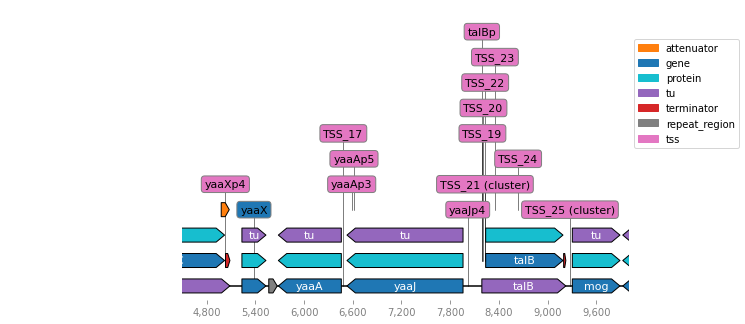

In [27]:
mg1655.view_region(4500, 10000)

In [28]:
snp_df = pd.read_csv('snp_df.csv')
snp_df.head()

Unnamed: 0  exp  ale  flask  isolate  tech_rep  presence Reference Seq  \
0          49  42C    1    124        1         1       1.0     NC_000913   
1         161  42C    1    124        1         1       1.0     NC_000913   
2          13  42C    1    124        1         1       1.0     NC_000913   
3          18  42C    2    163        1         1       1.0     NC_000913   
4         128  42C    2    163        1         1       1.0     NC_000913   

   Position Mutation Type           Details Sequence Change  Gene  coding  \
0   1308318           SNP  R110G (CGT→GGT)              G→C  clsA    True   
1   4187550           SNP  A734V (GCG→GTG)              C→T  rpoC    True   
2   4400313           SNP    D9A (GAT→GCT)              A→C   hfq    True   
3    149214           SNP  A130T (GCC→ACC)              C→T  panB    True   
4    219624           SNP  C124C (TGT→TGC)              A→G  rcsF    True   

           organism  
0  Escherichia coli  
1  Escherichia coli  
2  Escherichia coli  
3  Escherichia coli  
4  Escherichia coli

In [29]:
len(snp_df['exp'])

50573

In [30]:
len(snp_df['Position'])

50573

In [31]:
snp_df.loc[3,'Position']

149214

In [32]:
# snp positions without repeats

snp_positions = []
for i in range(50573):
     snp_positions.append(snp_df.loc[i,'Position'])

snp_positions = pd.concat([pd.DataFrame([i], columns=['Position']) for i in snp_positions],
          ignore_index=True)
snp_positions.head()

Position
0   1308318
1   4187550
2   4400313
3    149214
4    219624

In [33]:
features_num = mg1655.features_in_range(snp_positions.loc[5,'Position'],snp_positions.loc[5,'Position']+1).shape[0]
features_num

3

In [36]:
features_nums = []
for i in range(50573):
    features_nums.append(mg1655.features_in_range(snp_positions.loc[i,'Position'],
                                                  snp_positions.loc[i,'Position']+1).shape[0]) 
print(features_nums)

[3, 5, 13, 3, 3, 3, 3, 5, 1, 3, 3, 6, 3, 6, 4, 7, 5, 3, 4, 3, 3, 2, 5, 8, 3, 8, 6, 3, 3, 3, 4, 3, 2, 3, 3, 3, 3, 3, 8, 3, 1, 6, 1, 5, 4, 6, 3, 1, 5, 5, 3, 3, 5, 3, 5, 0, 6, 6, 5, 1, 1, 3, 4, 1, 3, 3, 3, 4, 7, 3, 3, 3, 4, 4, 3, 0, 3, 1, 1, 0, 1, 4, 3, 5, 1, 3, 3, 6, 3, 5, 3, 5, 13, 2, 3, 3, 5, 5, 3, 3, 5, 0, 7, 3, 4, 1, 6, 5, 1, 3, 1, 3, 4, 3, 4, 5, 4, 7, 3, 3, 2, 3, 4, 4, 4, 1, 6, 1, 3, 3, 0, 1, 5, 5, 3, 2, 3, 3, 3, 6, 3, 7, 3, 6, 1, 1, 7, 0, 5, 3, 5, 5, 5, 4, 4, 9, 5, 0, 3, 4, 6, 5, 5, 5, 3, 1, 3, 5, 4, 3, 3, 5, 5, 3, 3, 4, 5, 3, 3, 2, 3, 3, 4, 4, 7, 7, 0, 3, 0, 3, 3, 5, 3, 3, 8, 5, 3, 3, 0, 5, 1, 1, 7, 2, 3, 4, 3, 3, 0, 4, 5, 3, 2, 1, 3, 6, 3, 4, 3, 4, 3, 3, 1, 4, 3, 3, 2, 3, 5, 4, 4, 4, 5, 4, 3, 3, 3, 0, 3, 3, 3, 3, 8, 3, 1, 4, 0, 3, 3, 6, 3, 4, 3, 5, 3, 3, 0, 4, 3, 3, 3, 4, 2, 3, 1, 3, 0, 0, 3, 3, 3, 3, 5, 1, 3, 5, 5, 3, 4, 9, 0, 5, 0, 3, 6, 5, 5, 5, 5, 3, 8, 3, 4, 9, 1, 5, 5, 4, 3, 5, 5, 6, 4, 3, 3, 5, 5, 0, 5, 5, 5, 5, 5, 2, 3, 3, 5, 5, 5, 3, 9, 0, 0, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3

In [37]:
# list of snp_positions with repeats

list_of_snp_positions_with_repeats = []
for i,j in zip(snp_positions['Position'], features_nums):
    list_of_snp_positions_with_repeats += [i] * j
print(list_of_snp_positions_with_repeats)

[1308318, 1308318, 1308318, 4187550, 4187550, 4187550, 4187550, 4187550, 4400313, 4400313, 4400313, 4400313, 4400313, 4400313, 4400313, 4400313, 4400313, 4400313, 4400313, 4400313, 4400313, 149214, 149214, 149214, 219624, 219624, 219624, 232959, 232959, 232959, 429143, 429143, 429143, 701958, 701958, 701958, 701958, 701958, 703652, 945268, 945268, 945268, 949526, 949526, 949526, 1063365, 1063365, 1063365, 1063365, 1063365, 1063365, 1119438, 1119438, 1119438, 1144312, 1144312, 1144312, 1144312, 1144312, 1144312, 1170795, 1170795, 1170795, 1170795, 1331289, 1331289, 1331289, 1331289, 1331289, 1331289, 1331289, 1795485, 1795485, 1795485, 1795485, 1795485, 1878650, 1878650, 1878650, 2359914, 2359914, 2359914, 2359914, 2824686, 2824686, 2824686, 2888564, 2888564, 2888564, 3346530, 3346530, 4187550, 4187550, 4187550, 4187550, 4187550, 4397557, 4397557, 4397557, 4397557, 4397557, 4397557, 4397557, 4397557, 410479, 410479, 410479, 953802, 953802, 953802, 953802, 953802, 953802, 953802, 953802,

In [38]:
# exp names without repeats
exp_names = []
for i in range(50573):
    exp_names.append(snp_df.loc[i,'exp'])
print(exp_names)

['42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C'

In [39]:
# list of exp_names with repeats

list_of_exp_names_with_repeats = []
for i,j in zip(exp_names, features_nums):
    list_of_exp_names_with_repeats += [i] * j
print(list_of_exp_names_with_repeats)

['42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C', '42C'

In [40]:
len(list_of_exp_names_with_repeats)

181113

In [41]:
len(list_of_snp_positions_with_repeats)

181113

In [42]:
# match those locations with other annotated features in Bitome

mapped_features = pd.concat([pd.DataFrame(mg1655.features_in_range(i,i+1)) for i in snp_positions['Position']])
mapped_features['snp_position'] = list_of_snp_positions_with_repeats
mapped_features['experiment'] = list_of_exp_names_with_repeats

mapped_features = mapped_features
mapped_features.head()

left      right  strand pseudo  \
locus_tag                                           
b1249         1307185.0  1308645.0    -1.0  False   
b1249         1307185.0  1308645.0    -1.0    NaN   
ECK120011121  1306821.0  1308673.0    -1.0    NaN   
b3988         4185350.0  4189573.0     1.0  False   
b3988         4185350.0  4189573.0     1.0    NaN   

                                            name  cog essential  \
locus_tag                                                         
b1249                                       clsA    I       NaN   
b1249                     cardiolipin synthase 1  NaN       NaN   
ECK120011121                                 NaN  NaN       NaN   
b3988                                       rpoC    K      True   
b3988         RNA polymerase, beta prime subunit  NaN       NaN   

                       y-ome         tpm    tpm_ctrl  ...  box_35_left  \
locus_tag                                             ...                
b1249         well-annotated   96.743052   84.176592  ...          NaN   
b1249                    NaN         NaN         NaN  ...          NaN   
ECK120011121             NaN         NaN         NaN  ...          NaN   
b3988         well-annotated  986.076914  999.234328  ...          NaN   
b3988                    NaN         NaN         NaN  ...          NaN   

             box_35_right  attenuator_type mode  final_state   tf  \
locus_tag                                                           
b1249                 NaN              NaN  NaN          NaN  NaN   
b1249                 NaN              NaN  NaN          NaN  NaN   
ECK120011121          NaN              NaN  NaN          NaN  NaN   
b3988                 NaN              NaN  NaN          NaN  NaN   
b3988                 NaN              NaN  NaN          NaN  NaN   

              termination_type  GENE_ID snp_position experiment  
locus_tag                                                        
b1249                      NaN      NaN      1308318        42C  
b1249                      NaN      NaN      1308318        42C  
ECK120011121               NaN      NaN      1308318        42C  
b3988                      NaN      NaN      4187550        42C  
b3988                      NaN      NaN      4187550        42C  

[5 rows x 26 columns]

In [43]:
mapped_features.shape

(181113, 26)

In [44]:
# filter
# strand = 1, translation start site = left
# strand = -1, translation start site = right

strand_1 = mapped_features.loc[mapped_features['strand'] == 1]
strand_minus_1 = mapped_features.loc[mapped_features['strand'] == -1]

strand_1

left      right  strand pseudo  \
locus_tag                                           
b3988         4185350.0  4189573.0     1.0  False   
b3988         4185350.0  4189573.0     1.0    NaN   
ECK120009179  4181063.0  4189613.0     1.0    NaN   
ECK120009523  4179623.0  4189613.0     1.0    NaN   
ECK120011093  4178354.0  4189613.0     1.0    NaN   
...                 ...        ...     ...    ...   
ECK120009523  4179623.0  4189613.0     1.0    NaN   
ECK120011093  4178354.0  4189613.0     1.0    NaN   
b4366         4604160.0  4604837.0     1.0  False   
b4366         4604160.0  4604837.0     1.0    NaN   
ECK120034111  4603319.0  4604837.0     1.0    NaN   

                                              name  cog essential  \
locus_tag                                                           
b3988                                         rpoC    K      True   
b3988           RNA polymerase, beta prime subunit  NaN       NaN   
ECK120009179                                 rpoBC  NaN       NaN   
ECK120009523                           rplJL-rpoBC  NaN       NaN   
ECK120011093                         rplKAJL-rpoBC  NaN       NaN   
...                                            ...  ...       ...   
ECK120009523                           rplJL-rpoBC  NaN       NaN   
ECK120011093                         rplKAJL-rpoBC  NaN       NaN   
b4366                                         bglJ    T       NaN   
b4366         bgl operon transcriptional activator  NaN       NaN   
ECK120034111                             yjjQ-bglJ  NaN       NaN   

                       y-ome         tpm    tpm_ctrl  ...  box_35_left  \
locus_tag                                             ...                
b3988         well-annotated  986.076914  999.234328  ...          NaN   
b3988                    NaN         NaN         NaN  ...          NaN   
ECK120009179             NaN         NaN         NaN  ...          NaN   
ECK120009523             NaN         NaN         NaN  ...          NaN   
ECK120011093             NaN         NaN         NaN  ...          NaN   
...                      ...         ...         ...  ...          ...   
ECK120009523             NaN         NaN         NaN  ...          NaN   
ECK120011093             NaN         NaN         NaN  ...          NaN   
b4366         well-annotated    2.663143    1.060890  ...          NaN   
b4366                    NaN         NaN         NaN  ...          NaN   
ECK120034111             NaN         NaN         NaN  ...    4603284.0   

             box_35_right  attenuator_type mode  final_state   tf  \
locus_tag                                                           
b3988                 NaN              NaN  NaN          NaN  NaN   
b3988                 NaN              NaN  NaN          NaN  NaN   
ECK120009179          NaN              NaN  NaN          NaN  NaN   
ECK120009523          NaN              NaN  NaN          NaN  NaN   
ECK120011093          NaN              NaN  NaN          NaN  NaN   
...                   ...              ...  ...          ...  ...   
ECK120009523          NaN              NaN  NaN          NaN  NaN   
ECK120011093          NaN              NaN  NaN          NaN  NaN   
b4366                 NaN              NaN  NaN          NaN  NaN   
b4366                 NaN              NaN  NaN          NaN  NaN   
ECK120034111    4603289.0              NaN  NaN          NaN  NaN   

              termination_type  GENE_ID snp_position experiment  
locus_tag                                                        
b3988                      NaN      NaN      4187550        42C  
b3988                      NaN      NaN      4187550        42C  
ECK120009179               NaN      NaN      4187550        42C  
ECK120009523               NaN      NaN      4187550        42C  
ECK120011093               NaN      NaN      4187550        42C  
...                        ...      ...          ...        ...  
ECK120009523               NaN      NaN   

In [45]:
# tss stands for translation start site

snp_overlap_1 = strand_1[strand_1['snp_position'] <= strand_1['left']]
snp_overlap_1['distance_to_tss_adj'] = snp_overlap_1['snp_position'] - snp_overlap_1['left']
snp_overlap_2 = strand_minus_1[strand_minus_1['snp_position'] >= strand_minus_1['right']]
snp_overlap_2['distance_to_tss_adj'] = -(snp_overlap_2['snp_position'] - snp_overlap_2['right'])
snp_overlap_1


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


left      right  strand pseudo  \
locus_tag                                              
NC_000913.3_128  1196220.0  1211412.0     1.0    NaN   
NC_000913.3_128  1196220.0  1211412.0     1.0    NaN   
NC_000913.3_128  1196220.0  1211412.0     1.0    NaN   
b0042              43188.0    44129.0     1.0  False   
b0042              43188.0    44129.0     1.0    NaN   
...                    ...        ...     ...    ...   
ECK120021239     1743457.0  1744830.0     1.0    NaN   
NC_000913.3_128  1196220.0  1211412.0     1.0    NaN   
NC_000913.3_128  1196220.0  1211412.0     1.0    NaN   
NC_000913.3_128  1196220.0  1211412.0     1.0    NaN   
NC_000913.3_128  1196220.0  1211412.0     1.0    NaN   

                                                              name  cog  \
locus_tag                                                                 
NC_000913.3_128                                                NaN  NaN   
NC_000913.3_128                                                NaN  NaN   
NC_000913.3_128                                                NaN  NaN   
b0042                                                         fixB    C   
b0042            putative electron transfer flavoprotein, NAD/F...  NaN   
...                                                            ...  ...   
ECK120021239                                                  mdtK  NaN   
NC_000913.3_128                                                NaN  NaN   
NC_000913.3_128                                                NaN  NaN   
NC_000913.3_128                                                NaN  NaN   
NC_000913.3_128                                                NaN  NaN   

                essential  y-ome       tpm  tpm_ctrl  ...  box_35_right  \
locus_tag                                             ...                 
NC_000913.3_128       NaN    NaN       NaN       NaN  ...           NaN   
NC_000913.3_128       NaN    NaN       NaN       NaN  ...           NaN   
NC_000913.3_128       NaN    NaN       NaN       NaN  ...           NaN   
b0042                 NaN  y-ome  1.265437  1.233765  ...           NaN   
b0042                 NaN    NaN       NaN       NaN  ...           NaN   
...                   ...    ...       ...       ...  ...           ...   
ECK120021239          NaN    NaN       NaN       NaN  ...           NaN   
NC_000913.3_128       NaN    NaN       NaN       NaN  ...           NaN   
NC_000913.3_128       NaN    NaN       NaN       NaN  ...           NaN   
NC_000913.3_128       NaN    NaN       NaN       NaN  ...           NaN   
NC_000913.3_128       NaN    NaN       NaN       NaN  ...           NaN   

                attenuator_type  mode final_state   tf  termination_type  \
locus_tag                                                                  
NC_000913.3_128             NaN   NaN         NaN  NaN               NaN   
NC_000913.3_128             NaN   NaN         NaN  NaN               NaN   
NC_000913.3_128             NaN   NaN         NaN  NaN               NaN   
b0042                       NaN   NaN         NaN  NaN               NaN   
b0042                       NaN   NaN         NaN  NaN               NaN   
...                         ...   ...         ...  ...               ...   
ECK120021239                NaN   NaN         NaN  NaN               NaN   
NC_000913.3_128             NaN   NaN         NaN  NaN               NaN   
NC_000913.3_128             NaN   NaN         NaN  NaN               NaN   
NC_000913.3_128             NaN   NaN         NaN  NaN               NaN   
NC_000913.3_128             NaN   NaN         NaN  NaN               NaN   

                 GENE_ID  snp_position  \
locus_tag                                
NC_000913.3_128      NaN       1196220   
NC_000913.3_128      NaN       1196220   
NC_000913.3_128      NaN       1196220   
b0042                NaN         43187   
b0042                NaN         43187   
...                  ...           ...   
ECK120021239    

In [46]:
mutations_before_translation_start_site = pd.concat([snp_overlap_1, snp_overlap_2])

In [47]:
mutations_before_translation_start_site.shape

(707, 27)

In [48]:
# move position/exp name/distance to tss to the front

first_col = mutations_before_translation_start_site.pop('name')
second_col = mutations_before_translation_start_site.pop('experiment')
third_col = mutations_before_translation_start_site.pop('strand')
fourth_col = mutations_before_translation_start_site.pop('snp_position')
six_col = mutations_before_translation_start_site.pop('distance_to_tss_adj')
mutations_before_translation_start_site.insert(0, 'name', first_col)
mutations_before_translation_start_site.insert(1,'experiment', second_col)
mutations_before_translation_start_site.insert(2, 'strand', third_col)
mutations_before_translation_start_site.insert(3, 'snp_position', fourth_col)
mutations_before_translation_start_site.insert(5,'distance_to_tss_adj', six_col)
mutations_before_translation_start_site.head()

name  \
locus_tag                                                            
NC_000913.3_128                                                NaN   
NC_000913.3_128                                                NaN   
NC_000913.3_128                                                NaN   
b0042                                                         fixB   
b0042            putative electron transfer flavoprotein, NAD/F...   

                                                        experiment  strand  \
locus_tag                                                                    
NC_000913.3_128  BOP1000-M9-mid-log-37-Glucose4-NH4Cl1-KH2PO43-...     1.0   
NC_000913.3_128  BOP1000-M9-mid-log-37-Glucose4-NH4Cl1-KH2PO43-...     1.0   
NC_000913.3_128  BOP1000-M9-mid-log-37-Glucose4-NH4Cl1-KH2PO43-...     1.0   
b0042            BOP27-M9-NC_000913_3gb-log-37-Glucose2-NH4Cl1-...     1.0   
b0042            BOP27-M9-NC_000913_3gb-log-37-Glucose2-NH4Cl1-...     1.0   

                 snp_position       left  distance_to_tss_adj      right  \
locus_tag                                                                  
NC_000913.3_128       1196220  1196220.0                  0.0  1211412.0   
NC_000913.3_128       1196220  1196220.0                  0.0  1211412.0   
NC_000913.3_128       1196220  1196220.0                  0.0  1211412.0   
b0042                   43187    43188.0                 -1.0    44129.0   
b0042                   43187    43188.0                 -1.0    44129.0   

                pseudo  cog essential  ... box_10_left  box_10_right  \
locus_tag                              ...                             
NC_000913.3_128    NaN  NaN       NaN  ...         NaN           NaN   
NC_000913.3_128    NaN  NaN       NaN  ...         NaN           NaN   
NC_000913.3_128    NaN  NaN       NaN  ...         NaN           NaN   
b0042            False    C       NaN  ...         NaN           NaN   
b0042              NaN  NaN       NaN  ...         NaN           NaN   

                 box_35_left  box_35_right attenuator_type  mode final_state  \
locus_tag                                                                      
NC_000913.3_128          NaN           NaN             NaN   NaN         NaN   
NC_000913.3_128          NaN           NaN             NaN   NaN         NaN   
NC_000913.3_128          NaN           NaN             NaN   NaN         NaN   
b0042                    NaN           NaN             NaN   NaN         NaN   
b0042                    NaN           NaN             NaN   NaN         NaN   

                  tf  termination_type  GENE_ID  
locus_tag                                        
NC_000913.3_128  NaN               NaN      NaN  
NC_000913.3_128  NaN               NaN      NaN  
NC_000913.3_128  NaN               NaN      NaN  
b0042            NaN               NaN      NaN  
b0042            NaN               NaN      NaN  

[5 rows x 27 columns]

In [49]:
# download as csv for overall features
mutations_before_translation_start_site.to_csv('mutations_before_translation_start_site.csv')